- Summary
- Business Understanding
- Data Understanding


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


# Wes

# Namsoo

# Harshitha

In [5]:
apple_related = 'ipad|apple|iphone|itunes'

In [6]:
df['tweet_text'].str.contains(apple_related).sum()

979

In [7]:
df.shape

(9093, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [ ]:
df["tweet_text"].value_counts()

In [10]:
# null values
df.isna().sum().sort_values(ascending=False)

emotion_in_tweet_is_directed_at                       5802
tweet_text                                               1
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [11]:
df.dropna(subset=['tweet_text'], inplace=True)

In [12]:
# unique values
df.nunique().sort_values(ascending=True)

is_there_an_emotion_directed_at_a_brand_or_product       4
emotion_in_tweet_is_directed_at                          9
tweet_text                                            9065
dtype: int64

In [13]:
# product information
df["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

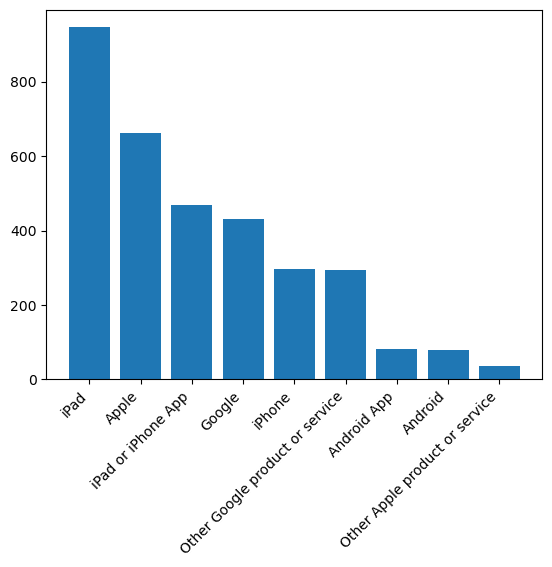

In [14]:
# bar chart for products
counts = df["emotion_in_tweet_is_directed_at"].value_counts()


plt.bar(counts.index, counts.values)
plt
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# dictionary for apple vs google products
df_test = df

df_test_dict = {'iPad' : 'Apple', "Apple" : 'Apple', "iPad or iPhone App" : "Apple", "Google" : "Google", "iPhone" : "Apple", 
                "Other Google product or service" : "Google", "Android App" : "Google", "Android" : "Google", "Other Apple product or service" : "Apple"
              }
df_test['emotion_in_tweet_is_directed_at'] = df_test['emotion_in_tweet_is_directed_at'].map(df_test_dict)
df_test['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
Apple     2409
Google     882
Name: count, dtype: int64

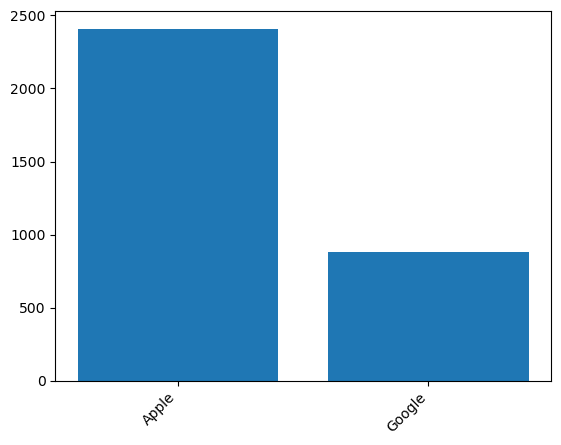

In [16]:
# bar chart for google vs apple products
brand_counts = df_test["emotion_in_tweet_is_directed_at"].value_counts()


plt.bar(brand_counts.index, brand_counts.values)
plt
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# looking at emotion column
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [18]:
# checking null values
df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

* a lot of null values for emotion_in_tweet column

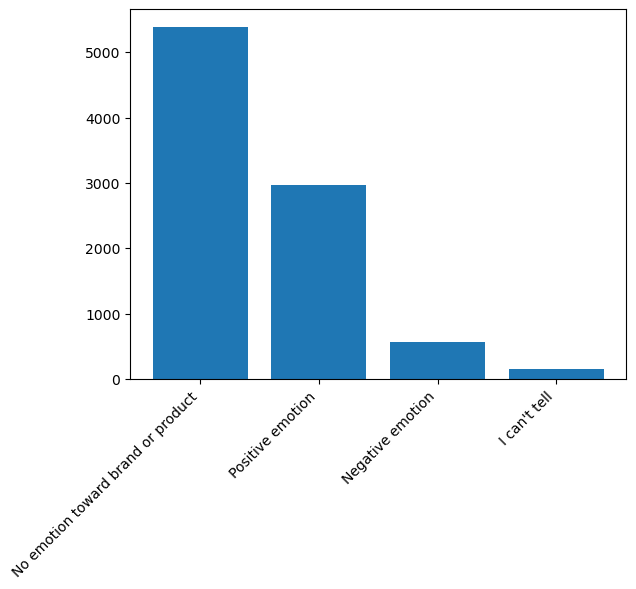

In [19]:
# plot for emotion column 
import matplotlib.pyplot as plt
emotion_counts = df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

# Plotting
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# rename column
df_test.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

In [21]:
# assigning emotions a score of 1, 0, 2
emotions = {'No emotion toward brand or product':2, 'Positive emotion':1, 'Negative emotion':0, "I can't tell": 2}
df_test['emotion'] = df_test['emotion'].map(emotions)


In [22]:
df_test['emotion'].value_counts()


emotion
2    5544
1    2978
0     570
Name: count, dtype: int64

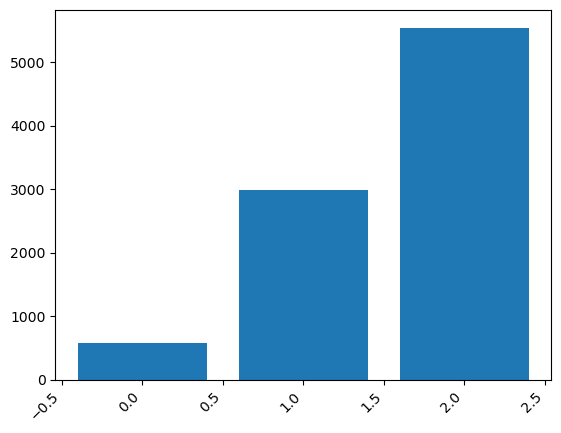

In [23]:
# plot for emotion
emotion_plot = df["emotion"].value_counts()

plt.bar(emotion_plot.index, emotion_plot.values)
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
df_test.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,1
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,1
3,@sxsw I hope this year's festival isn't as cra...,Apple,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1


In [25]:
# tweet length
df_test["tweet_text"].str.len()


0       127
1       139
2        79
3        82
4       131
       ... 
9088     29
9089    125
9090    145
9091    140
9092    104
Name: tweet_text, Length: 9092, dtype: int64

In [26]:
# tweets containing SXSW
rows_with_sxsw = df_test["tweet_text"].apply(lambda x: "SXSW" in str(x).upper())
rows_with_sxsw.sum()

9084

# Train test split

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['emotion'], axis=1)
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
train_sample = X_train.sample(5, random_state=42)
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at
899,"Brilliant move by Apple: before it even begins, Apple wins #SXSW {link}",Apple
7432,{link} Report: Apple to Open Pop-Up Store at #SXSW,nan
8515,omg ÛÏ@mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link},Apple
2951,"#sxsw: @mention intrvw @mention ""Govt is not a vending machine [put in $, get svcs], it's a platform; iPhone was a teaching moment""",Apple
8963,"Group #Texting War Heats Up: Fast Society Launches New Android App, Updates iPhone App: #SXSWÛ_ {link}",Google


# Preprocessing

In [35]:
# lowercase 
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

/var/folders/bk/x2x4c5yj1vg12qd9whz6kg300000gn/T/ipykernel_30442/1702285824.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s:s.lower() if type(s) == str else s)


In [ ]:
df.head().style.set_properties(**{'text-align': 'left'})



In [39]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
#nltk.download('stopwords')
#nltk.download('wordnet')

sw = list(set(stopwords.words('english')) - {'not'})
sw.extend(['sxsw'])

In [41]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [37]:
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    # print(doc)
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [ ]:
token_docs = [doc_preparer(doc, sw) for doc in X_train]

In [ ]:
print(len(token_docs), len(X_train), len(y_train))

* function for pre processing

In [ ]:
import re
import unicodedata
from nltk.corpus import stopwords
def clean_tweet(text):
    # Remove hashtags (words starting with '#')
    text = re.sub(r'#\w+', '', text)
    
    # Handle RT tags
    text = re.sub(r'[Rr][Tt]', '', text)
    
    # Remove mentions (words starting with '@')
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
        
    # Remove special characters and numbers not adjacent to text
    text = re.sub(r'\b\d+\b', '', text)

    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = [word for word in text.split() if word not in stop_words]

    # Unique words to remove, add more as needed
    words_to_remove = ['Austin', 'Link', 'Sxsw', 'sxsw']

    for word in words_to_remove:
        cleaned_text = [w for w in cleaned_text if not re.match(r'\b{}\b'.format(word), w, flags=re.IGNORECASE)]

    return ' '.join(cleaned_text)

In [ ]:
# Apply the clean_tweet function and see output
df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
df.head()

* tokenization


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

df['tweet_text'].head()

In [ ]:

from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(df)[:10]

In [ ]:
df["tweet_text"].apply(tokenizer.tokenize)
# Display full text
df.style.set_properties(**{'text-align': 'left'})

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# Function to preprocess tweets
def preprocess(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s@#]', ' ', tweet)
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)
    tweet = re.sub(r'^b\s+', '', tweet)
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in stop_words]
    tweet = ' '.join(tweet)
    return tweet


Wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 



In [ ]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## EDA